<a href="https://colab.research.google.com/github/ritamsarkar2000/ML/blob/master/movie_reviews_and_word_embaddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                          split = (tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info = True, as_supervised = True)

In [3]:
encoder = info.features['text'].encoder
encoder.vocab_size

8185

In [4]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [5]:
training_batch, train_labels = next(iter(train_batches))
training_batch.numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10, 697), dtype=int64, numpy=
array([[5467,  644, 7968, ...,  851, 1525, 5445],
       [  14,    9,   45, ...,    0,    0,    0],
       [ 634,   51,    1, ...,    0,    0,    0],
       ...,
       [  12,   81,  742, ...,    0,    0,    0],
       [  62,    9,    4, ...,    0,    0,    0],
       [ 133, 4446,    2, ...,    0,    0,    0]])>>

In [6]:
train_labels.numpy()

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [7]:
# building the model

embedding_dim = 16

model = keras.Sequential([layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_batches,
          epochs = 9,
          validation_data = test_batches, 
          validation_steps = 20)

Epoch 1/9
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6745 - accuracy: 0.5688 - val_loss: 0.6177 - val_accuracy: 0.7950
Epoch 2/9
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5817 - accuracy: 0.8494 - val_loss: 0.5930 - val_accuracy: 0.8250
Epoch 3/9
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5569 - accuracy: 0.8947 - val_loss: 0.5567 - val_accuracy: 0.8600
Epoch 4/9
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5470 - accuracy: 0.9131 - val_loss: 0.5651 - val_accuracy: 0.8650
Epoch 5/9
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5406 - accuracy: 0.9251 - val_loss: 0.5489 - val_accuracy: 0.8900
Epoch 6/9
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5362 - accuracy: 0.9338 - val_loss: 0.5565 - val_accuracy: 0.8300
Epoch 7/9
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5327 - accuracy: 0.9406 - val_loss: 0.5751 - val_accuracy:

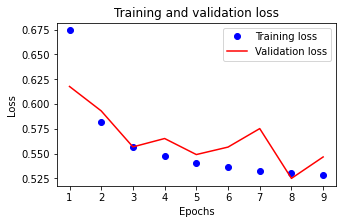

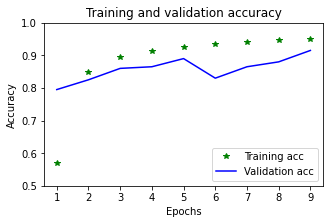

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(5,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(epochs, acc, 'g*', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [24]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [25]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>